In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('V3_data_1997.csv', parse_dates=['DATE'])
data.index = data['DATE']
data = data.drop(columns='DATE')
data

,Unemp_Rate,Per_Cap_Pers_Income,Housing_Price_Index,Rental_Vac_Rate,Consumption_HH,SNAP,Med_Income_SL,Population
DATE,,,,,,,,
1997-01-01,3.3,21288,217.92,14.4,37325.7,101750,44118,2065.397
1997-04-01,3.1,21288,219.14,14.4,37325.7,97331,44118,2065.397
1997-07-01,3.1,21288,223.41,14.4,37325.7,93796,44118,2065.397
1997-10-01,3.1,21288,227.32,14.4,37325.7,92254,44118,2065.397
1998-01-01,3.4,22266,229.99,14.6,39429.7,93733,45484,2100.562
...,...,...,...,...,...,...,...,...
2020-01-01,2.4,52204,522.38,5.3,121445.4,163926,79294,3281.684
2020-04-01,10.1,52204,531.90,5.3,121445.4,164234,79294,3281.684
2020-07-01,5.4,52204,544.73,5.3,121445.4,164234,79294,3281.684


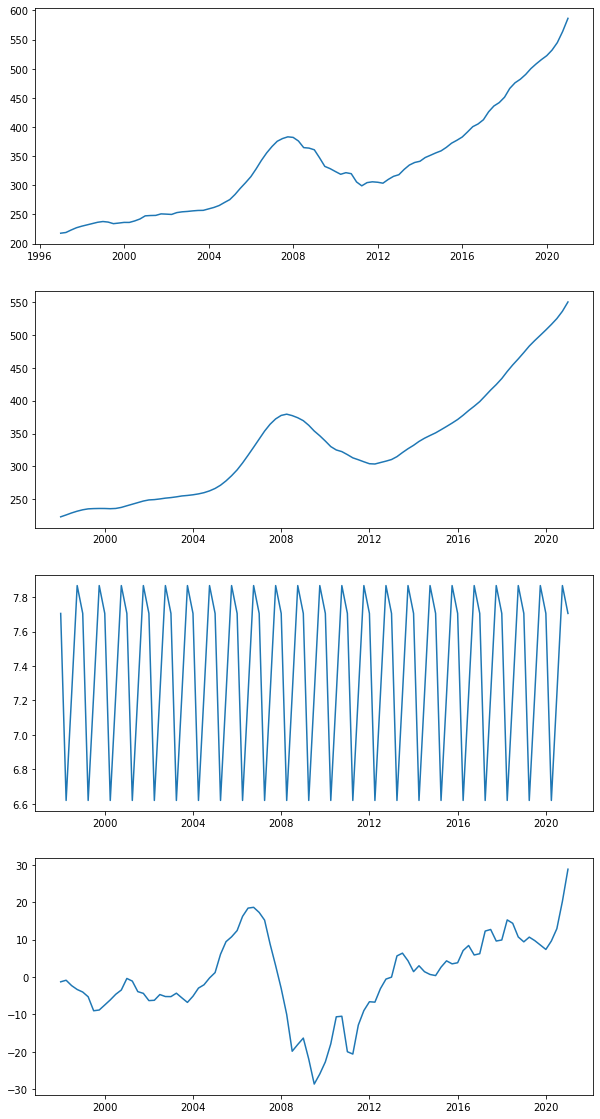

In [37]:
housing = data['Housing_Price_Index'].to_numpy()
domain = data.index.to_numpy()
fig, ax = plt.subplots(4, 1, figsize=(10, 20))
ax[0].plot(domain, housing)

trend = (1/5) * (housing[4:] + housing[3:-1] + housing[2:-2] + housing[1:-3] + housing[:-4])
ax[1].plot(domain[4:], trend)

rest = housing[4:] - trend
seasonality = np.array([np.average(rest[::4]), np.average(rest[1::4]), np.average(rest[2::4]), np.average(rest[3::4])])
seasonality = np.tile(seasonality, 24)
ax[2].plot(domain[4:], seasonality[:-3])

rest = rest - seasonality[:-3]
ax[3].plot(domain[4:], rest)
plt.show()
